**Logistic Regression:**

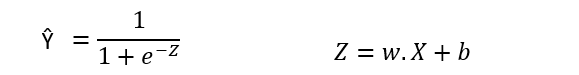

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Derivatives:**

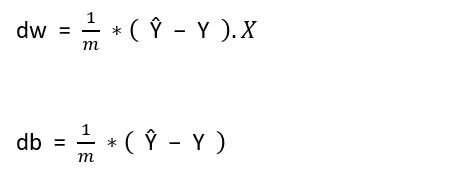

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Importing the Dependencies

In [1]:
# importing numpy library
import numpy as np

**Logistic Regression**

In [2]:
class LogisticRegression(): 
    def __init__(self, lr, epochs): 
        # initialize hyperparameters
        self.lr = lr
        self.epochs = epochs 
    
    def fit(self, X, y):
        # get number of data and features
        self.num_of_data, self.features = X.shape

        # initialize the parameters
        self.W = np.zeros(self.features)
        self.b = 0 

        self.X = X
        self.y = y

        for i in range(self.epochs):
            self.update_hyperparam()

    def update_hyperparam(self):
        # calculate y_hat 
        y_hat = 1 / (1 + np.exp( - (self.X.dot(self.W) + self.b)))

        # derivative
        dw = (1/self.num_of_data) * np.dot(self.X.T, (y_hat - self.y))
        db = (1/self.num_of_data) * np.sum(y_hat - self.y)

        # update weight and bias
        self.W = self.W - self.lr*dw
        self.b = self.b - self.lr*db

    def predict(self, X): 
        y_pred = 1 / (1 + np.exp(- (X.dot(self.W) + self.b)))
        y_pred = np.where(y_pred < 0.5, 0, 1)
        return y_pred

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
file = "diabetes.csv"
df = pd.read_csv(file)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [9]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

print(X) 

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(768, 8)
(614, 8)
(154, 8)


In [11]:
classifier = LogisticRegression(lr=0.01, epochs=1000)
classifier.fit(X_train,y_train)

In [12]:
train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)

print(f"Accuracy on training data: {train_accuracy}")

Accuracy on training data: 0.7768729641693811


In [13]:
test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)

print(f"Accuracy on training data: {test_accuracy}")

Accuracy on training data: 0.7662337662337663


In [14]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_to_array = np.asarray(input_data)
input_reshape = input_to_array.reshape(1,-1)

std_data = scaler.transform(input_reshape)

prediction = classifier.predict(std_data)

if (prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is diabetic


d:\miniconda3\envs\data_science\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
print(classifier.W)
print(classifier.b)

[ 0.33983533  0.8123933  -0.12115335  0.03903535  0.00811976  0.47139923
  0.25171989  0.20708692]
-0.6013010748260914
